# Numpy Package

In [2]:
import numpy as np
import timeit

## Document and Auto-completion in Jupyter

In [3]:
# np.[TAB]
np.

SyntaxError: invalid syntax (<ipython-input-3-e955075c54d7>, line 2)

In [4]:
# Help document
np.random.normal

<function RandomState.normal>

In [5]:
# [Sh-Tab] to show function arguments
np.random.normal

<function RandomState.normal>

## Vector & Matrix

In [6]:
t = np.array([0, 1, 2, 3, 4, 5, 6])

print(t)
print(t.ndim) # rank
print(t.shape) # shape
print(t[0], t[1], t[-1])
print(t[2:5], t[4:-1])
print(t[:2], t[3:])

[0 1 2 3 4 5 6]
1
(7,)
0 1 6
[2 3 4] [4 5]
[0 1] [3 4 5 6]


## Matrix multiplication

In [7]:
vec_x = np.array([2, 5, 2])
mat_A = np.array([[1, 0.7, -0.2], [0.2, 1, 0.5], [0.2, -0.5, 1]])
print(vec_x, '\n', mat_A)

[2 5 2] 
 [[ 1.   0.7 -0.2]
 [ 0.2  1.   0.5]
 [ 0.2 -0.5  1. ]]


In [8]:
# Vector * Vector (Matrix * Matrix): Component-wise
print(vec_x * vec_x, '\n')
print(mat_A * mat_A, '\n')

# Matrix x Vector ??: component-wise in each vector
print( mat_A * vec_x, '\n')
print( vec_x * mat_A, '\n') # Same

[ 4 25  4] 

[[1.   0.49 0.04]
 [0.04 1.   0.25]
 [0.04 0.25 1.  ]] 

[[ 2.   3.5 -0.4]
 [ 0.4  5.   1. ]
 [ 0.4 -2.5  2. ]] 

[[ 2.   3.5 -0.4]
 [ 0.4  5.   1. ]
 [ 0.4 -2.5  2. ]] 



In [9]:
mat_B = np.arange(12).reshape((3,4))
vec_y = np.arange(4)
print(mat_B, vec_y)
mat_B * vec_y 

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] [0 1 2 3]


array([[ 0,  1,  4,  9],
       [ 0,  5, 12, 21],
       [ 0,  9, 20, 33]])

In [10]:
# Dot(inner) product
vec_y = vec_x + 1
print( np.dot(vec_x, vec_y) )
print( vec_x.dot(vec_y) ) # same
print( vec_x@vec_y ) # Because Python treats vec_y as a coloumn vector, it gives the same result.

42
42
42


In [11]:
# Matrix multiplication ?
print(mat_A @ mat_A, '\n')
# print(np.matmul(mat_A, mat_A), '\n')  # @ is exactly same as np.matmul

print(mat_A @ vec_x, '\n')  # vec_x is treated as a column vector

print(vec_x @ mat_A) # vec_x is treated as a row vector

[[ 1.1   1.5  -0.05]
 [ 0.5   0.89  0.96]
 [ 0.3  -0.86  0.71]] 

[ 5.1  6.4 -0.1] 

[3.4 5.4 4.1]


In [12]:
# Convert vecto to a matrix with single column
vec_x_col = vec_x[:,None] # add a second dimension j with None elements so that it becomes a column vector
print(vec_x_col) # The three methods below give the same result, but this one is preferred
print( np.reshape(vec_x,(3,1)) )
print( vec_x.reshape((3,1)) )
vec_x_2 = vec_x[None,:]
print(vec_x_2)
vec_x_3 = vec_x[None,:, None]
print(vec_x_3)

[[2]
 [5]
 [2]]
[[2]
 [5]
 [2]]
[[2]
 [5]
 [2]]
[[2 5 2]]
[[[2]
  [5]
  [2]]]


In [13]:
vec_x = np.arange(5)
print(vec_x)

[0 1 2 3 4]


In [14]:
vec_x + vec_x[:,None]

array([[0, 1, 2, 3, 4],
       [1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6],
       [3, 4, 5, 6, 7],
       [4, 5, 6, 7, 8]])

In [15]:
vec_x * vec_x[:,None]

array([[ 0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4],
       [ 0,  2,  4,  6,  8],
       [ 0,  3,  6,  9, 12],
       [ 0,  4,  8, 12, 16]])

In [16]:
vec_x + vec_x_col

array([[2, 3, 4, 5, 6],
       [5, 6, 7, 8, 9],
       [2, 3, 4, 5, 6]])

In [17]:
mat_A * vec_x[:, None]

ValueError: operands could not be broadcast together with shapes (3,3) (5,1) 

In [18]:
vec_x[None,:,None]

array([[[0],
        [1],
        [2],
        [3],
        [4]]])

## N-d Array Initialization

In [19]:
vec_y = np.ones(10)
vec_z = np.zeros((5,3), dtype=int)
print(vec_z)

#mat_B = np.zeros((3,3))
#mat_B = np.zeros_like(mat_A)
mat_B = np.ones_like(mat_A)
print(mat_B)

x_norm = np.random.normal(10,2,size=(10000,5))
x_unif = np.random.uniform(size=(10000,5))
# x_unif = np.random.uniform(size=mat_A.shape)

[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [20]:
x_norm

array([[10.87689249, 11.99304624,  9.47890032, 12.69277723, 11.02054951],
       [10.67003291,  8.54497294, 10.7060769 ,  8.89821771, 11.24792269],
       [10.44187918, 11.07513908,  9.51533446, 10.38353151, 11.76904533],
       ...,
       [ 9.40842622, 13.39556991, 12.64078743,  9.26892182, 11.18083425],
       [12.34528326,  8.6420971 , 11.40992832,  9.88021738,  9.50841099],
       [10.81626024,  7.93425286,  7.84766494, 11.32548178,  9.07537394]])

In [21]:
x_unif

array([[0.07147519, 0.63556363, 0.97991576, 0.42588261, 0.9297101 ],
       [0.13887148, 0.77844077, 0.19611217, 0.50074995, 0.18301224],
       [0.32102764, 0.23773104, 0.72421894, 0.12168976, 0.0382161 ],
       ...,
       [0.57944471, 0.90670192, 0.80821815, 0.32956579, 0.76936596],
       [0.01068354, 0.68155629, 0.5770475 , 0.22560392, 0.41562673],
       [0.95148767, 0.56166123, 0.71628133, 0.86929026, 0.07566526]])

## Operations on Matrix (N-d array)

In [22]:
# Axis 0: Column, Axis 1: Row
# But they both return a row vector
print( np.mean(x_norm, axis=0) )
print( np.std(x_norm, axis=0) )

[10.01055093 10.02503185  9.97326156 10.02308325 10.0018122 ]
[1.98373842 2.0135571  2.00960431 2.00389519 2.00313764]


In [23]:
print( np.mean(x_norm) ) # mean of everything in the matrix
print( np.mean(x_norm,axis=0) )
print( np.mean(x_norm,axis=1) )
print( np.mean(x_norm,axis=(0,1)) ) # mean of the two axis together

10.006747960805134
[10.01055093 10.02503185  9.97326156 10.02308325 10.0018122 ]
[11.21243316 10.01344463 10.63698591 ... 11.17890792 10.35718741
  9.39980675]
10.006747960805134


In [24]:
# Random Walk Simulation
x_rw = np.random.binomial(1,0.5,size=(1000,10))*2 - 1
x_rw

array([[-1,  1, -1, ..., -1, -1,  1],
       [-1,  1,  1, ..., -1, -1,  1],
       [-1, -1, -1, ...,  1, -1,  1],
       ...,
       [-1, -1, -1, ...,  1,  1,  1],
       [-1, -1,  1, ..., -1, -1, -1],
       [-1,  1, -1, ..., -1,  1, -1]])

In [25]:
x_cum = np.cumsum(x_rw, axis=0)
print(x_cum)

[[ -1   1  -1 ...  -1  -1   1]
 [ -2   2   0 ...  -2  -2   2]
 [ -3   1  -1 ...  -1  -3   3]
 ...
 [ 50 -18 -24 ... -32  46   0]
 [ 49 -19 -23 ... -33  45  -1]
 [ 48 -18 -24 ... -34  46  -2]]


In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

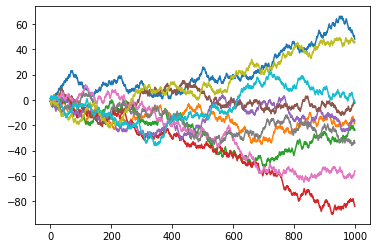

In [27]:
plt.plot(x_cum)

In [28]:
mat_B = np.arange(12).reshape((3,4))
vec_x = np.arange(4)
vec_y = np.arange(3)
print(mat_B)
print(vec_x)
print(vec_y)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2 3]
[0 1 2]


In [29]:
# vertically stack
print(np.vstack([mat_B, mat_B])) 
print(np.vstack([mat_B, vec_x]))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [ 0  1  2  3]]


In [30]:
# horizontally stack
print(np.hstack([mat_B, mat_B])) 
# print(np.hstack([mat_B, vec_y]))
print(np.hstack([mat_B, vec_y[:,None]]))

[[ 0  1  2  3  0  1  2  3]
 [ 4  5  6  7  4  5  6  7]
 [ 8  9 10 11  8  9 10 11]]
[[ 0  1  2  3  0]
 [ 4  5  6  7  1]
 [ 8  9 10 11  2]]


# Vectorization is fast
* Using `for` or `while` loop is very slow
* Always find proper vectorization operation

In [31]:
# We're going to simulate the mean of the maximum of 20 normal distribution.
nn = 100000
x_norm = np.random.normal(size=(nn,20))

### Using `for` loop

In [32]:
start_time = timeit.default_timer()
x_max = np.ones(x_norm.shape[0])
for k in range(nn):
    x_max[k] = max(x_norm[k,:])
val = x_max.mean()
elapsed = timeit.default_timer() - start_time
print(f'mean={val}, time={elapsed}')

mean=1.8705418891679246, time=0.455178298000007


### Vectorized Version

In [33]:
start_time = timeit.default_timer()
val = np.amax(x_norm, axis=1).mean() # difference: max(x,y) compares x and y element by element; amax(x) looks for maximum within x.
elapsed = timeit.default_timer() - start_time
print(f'mean={val}, time={elapsed}')

mean=1.8705418891679246, time=0.013843823000001976


In [34]:
assert np.all(x_max-x_max2 == 0)

NameError: name 'x_max2' is not defined

## Array view and Copy
* Array is view shares the same memory space
* Any change in the view will make the same change in the original array

In [35]:
mat_B = np.arange(12).reshape((3,4))
vec_x = mat_B[1,]  # kind of like 'pointer'
# vec_x = mat_B[1,].copy()  # make a copy so that vec_x can have an independent memory space
print(mat_B, vec_x)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] [4 5 6 7]


In [36]:
vec_x[-2] = -99

In [37]:
print(mat_B, vec_x)

[[  0   1   2   3]
 [  4   5 -99   7]
 [  8   9  10  11]] [  4   5 -99   7]


In [38]:
# mat_C is not a view
mat_B = np.arange(12).reshape((3,4))
# mat_C = mat_B+0
mat_C = mat_B*2
mat_C[1,1] = -99
print(mat_B, "\n", mat_C)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 
 [[  0   2   4   6]
 [  8 -99  12  14]
 [ 16  18  20  22]]
